### Heart Disease Prediction by using Logistic Algorithms

#### 1) Import  Basic LIBRARIES

In [1]:
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

#### 2) Imort the  DATAFRAME

In [2]:
df = pd.read_csv('heart.csv')

#### 3)Expolatory Data Analaysis

##### Check the Shape (Rows & Columns) of DataFrame

In [3]:
df.shape

(303, 14)

#####  Check the Datatypes of Features

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Get the First 5 Rows of DataFrame

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Get the Last 5 Rows of DataFrame

In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df['target'].unique()

array([1, 0], dtype=int64)

In [8]:
print(df.target.value_counts())

1    165
0    138
Name: target, dtype: int64


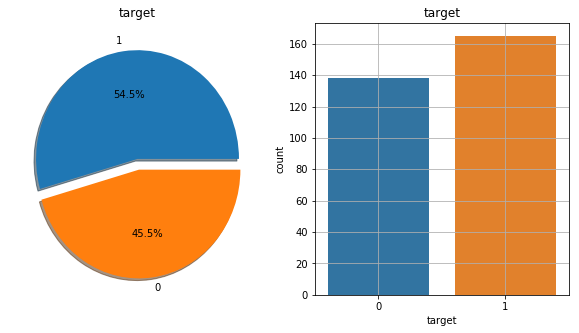

In [9]:
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(10,5))
df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=df,ax=ax[1])
ax[1].set_title('target')
plt.grid()
plt.show()

### Get All Numerical Features from DataFrame

In [ ]:
df.dtypes[df.dtypes != 'object']

### Distribution of Numerical Features

In [10]:
for features in df.dtypes[df.dtypes != 'object'].index:
    print(features)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


In [11]:
num_features = df.dtypes[df.dtypes != 'object'].index

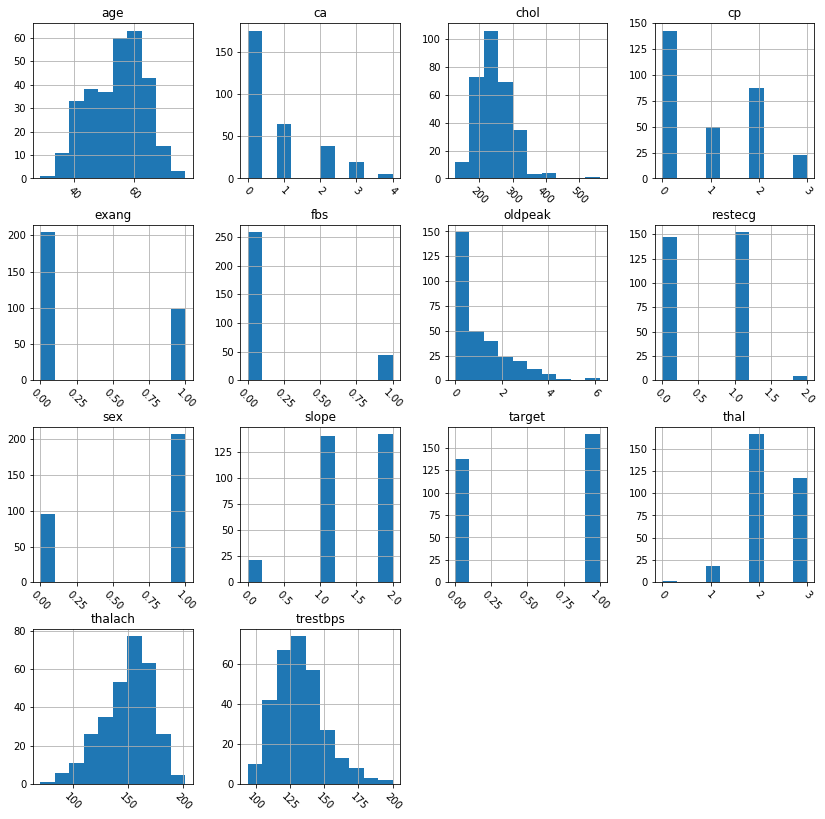

In [12]:
# Plot histogram grid
df[num_features].hist(xrot=-45, figsize=(14, 14))

# Clear the text "residue"
plt.show()

In [13]:
# Summarize numerical features
df[num_features].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Correlation

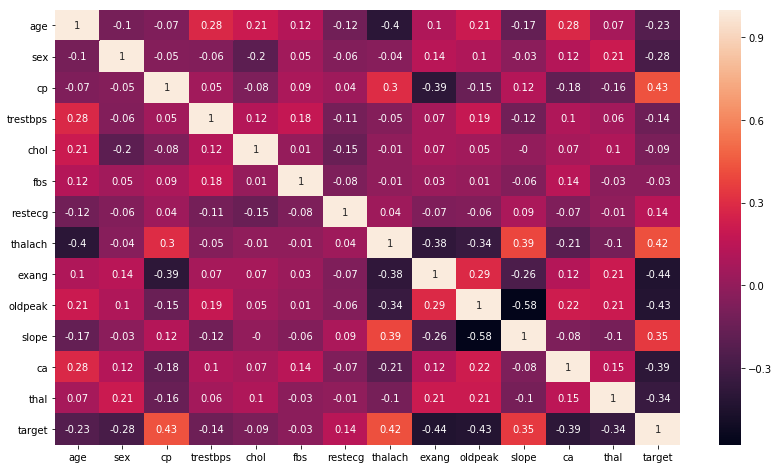

In [14]:
# correlation matrix for finding most significant variables
import seaborn as sns
plt.figure(figsize=(14, 8))
correlation = df.corr().round(2)
sns.heatmap(data=correlation,annot=True)
plt.show()

## DATA CLEANING

### Check the  Duplicates

In [15]:
# Check the Number of Rows before Removing Duplicates
df.shape

(303, 14)

In [16]:
# Call drop_duplicates on DataFrame to remove Duplicates and Assign it back to DataFrame
df = df.drop_duplicates()

In [17]:
# Check the Number of Rows after Removing Duplicates
df.shape

(302, 14)

In given data set there is no duplicates

### Check the Null Values

In [18]:
# Check Columns that has NULLs
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In given data set there is no Null values

## MODEL TRAINING

### Create seperate objects for TARGET & INPUT features

In [19]:
## Create the Separate Objects(X) & (y) for Target and Indpendent features
target_feature='target'
# Create the target object(y)
y=df[target_feature]

In [20]:
# Create the objedt(X) for independet variables
X=df.drop(target_feature,axis=1)

### Features scalling

In [21]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [23]:
mmsX = scaler.fit_transform(X)

### Create TRAIN & TEST datasets

In [24]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(mmsX, y, test_size=0.25, random_state=1)

In [26]:
X_train.shape, X_test.shape

((226, 13), (76, 13))

In [28]:
y_train.shape, y_test.shape

((226,), (76,))

## CLASSIFICATION ALGORITHMS

### Apply Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
regr = LogisticRegression()

In [31]:
regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Apply the Model On Test Data

In [34]:
y_pred = regr.predict(X_test)

In [35]:
y_pred.shape

(76,)

### Evaluation Metrics of the Model

#### Accuracy_Score

In [36]:
# import the metrics library
from sklearn.metrics import accuracy_score

In [37]:
# Check the Accuracy score of the Logistic regression Model based on y_test & y_pred
print("Accuracy Score is:", accuracy_score(y_test,y_pred)*100)

Accuracy Score is: 82.89473684210526


#### Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm=confusion_matrix(y_test,y_pred)
TP,FN,FP,TN=cm.ravel()
print(cm)

[[28  8]
 [ 5 35]]


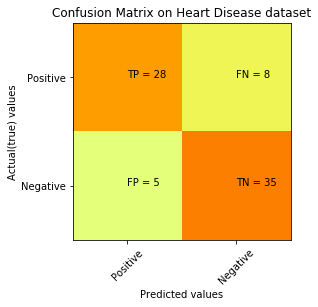

In [40]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Positive','Negative']
plt.title('Confusion Matrix on Heart Disease dataset')
plt.ylabel('Actual(true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [41]:
pd.crosstab(y_test, y_pred, margins=False) # zero(0) meanse patient have disease, one (1) meanse patient have No Diseae

col_0,0,1
target,,
0,28,8
1,5,35


In [42]:
pd.crosstab(y_test, y_pred, margins=True)

col_0,0,1,All
target,,,
0,28,8,36
1,5,35,40
All,33,43,76


In [43]:
pd.crosstab(y_test, y_pred, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values,0,1,All
Actual values,,,
0,28,8,36
1,5,35,40
All,33,43,76


### PRECISION (PPV-Positive Predictive Value)

Precision=TP/(TP+FP)

Where TP=True Positive

      FP=False Positive

In [44]:
precision=TP/(TP+FP)
print('precision',precision*100)

precision 84.84848484848484


In [45]:
from sklearn.metrics import precision_score
print("precision Score of macro is:", precision_score(y_test,y_pred, average='macro')*100)
print("precision Score of micro is:", precision_score(y_test,y_pred, average='micro')*100)
print("precision Score of weighted is:", precision_score(y_test,y_pred, average='weighted')*100)

precision Score of macro is: 83.12191684284707
precision Score of micro is: 82.89473684210526
precision Score of weighted is: 83.03104484255034


### Recall (TPR/ Sensitivity/Hit Rate)

TPR= TP/(TP+FN)

In [46]:
recall=TP/(TP+FN)
print('recall',recall)

recall 0.7777777777777778


In [48]:
from sklearn.metrics import recall_score
print("recall_Score of macro is:",recall_score(y_test,y_pred, average='macro')*100)
print("recall_Score of micro is:",recall_score(y_test,y_pred, average='micro')*100)
print("recall_Score of weighted is:",recall_score(y_test,y_pred, average='weighted')*100)

recall_Score of macro is: 82.63888888888889
recall_Score of micro is: 82.89473684210526
recall_Score of weighted is: 82.89473684210526


### F1-Score

In [54]:
F1_score=2*precision*recall/(precision+recall)

In [58]:
f1_score=(2*0.8376068376068376*0.9158878504672897)/(0.8376068376068376+0.9158878504672897)
f1_score

0.875

In [59]:
print('f1_score at  is:',f1_score*100)

f1_score at  is: 87.5


In [60]:
from sklearn.metrics import f1_score
print('f1_score of macro :',f1_score(y_test, y_pred, average='macro')*100)
print('f1_score of micro :',f1_score(y_test, y_pred, average='micro')*100)
print('f1_score of weighted :',f1_score(y_test, y_pred, average='weighted')*100)

f1_score of macro : 82.7483848437227
f1_score of micro : 82.89473684210526
f1_score of weighted : 82.83201455708416


### Classification Report

In [61]:
from sklearn.metrics import classification_report

In [62]:
print('classification report is:\n',classification_report(y_test,y_pred))

classification report is:
              precision    recall  f1-score   support

          0       0.85      0.78      0.81        36
          1       0.81      0.88      0.84        40

avg / total       0.83      0.83      0.83        76



### ROC Curve

In [63]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
y_pred_prob = regr.predict_proba(X_test)[:,1]

In [65]:
y_pred_prob.shape

(76,)

In [66]:
FPR,TPR, thresholds = roc_curve(y_test, y_pred_prob)

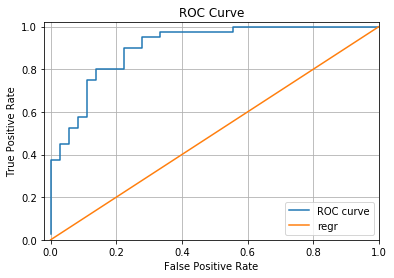

In [67]:
# create plot
plt.plot(FPR,TPR, label='ROC curve')
plt.plot([0, 1], [0, 1],label='regr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.grid()
plt.show()

### END